In [7]:
import numpy as np
import pandas as pd
import copy
from matplotlib import pyplot as plt

In [23]:
class performance_matrix:
    def __init__(self):
        self.threshold = 0.5
        self.confusion_matrix = np.arange(4).reshape(2, 2)

    def read_file_and_get_data(self, file_name):
        return pd.read_csv(file_name)

    def get_confusion_matrix(self, data):
        params = self.get_confusion_matrix_params(data)
        self.confusion_matrix[0][0] = params[0]
        self.confusion_matrix[0][1] = params[1]
        self.confusion_matrix[1][0] = params[2]
        self.confusion_matrix[1][1] = params[3]
        return self.confusion_matrix

    def get_confusion_matrix_params(self, data):
        tn = 0
        fn = 0
        fp = 0
        tp = 0
        positives_predicted = data['proba'] >= self.threshold
        predicted = positives_predicted.value_counts()
        size_positives_predicted = predicted[True]
        size_negative_predicted = len(data) - size_positives_predicted
        if size_positives_predicted > 0:
            actual_positive_points = data[positives_predicted]['y'] == 1
            predicted = actual_positive_points.value_counts()
            if True in predicted:
                tp = predicted[True]
            if False in predicted:
                fp = predicted[False]

        if size_negative_predicted > 0:
            negative_predicted = data['proba'] < self.threshold
            actual_negative_points = data[negative_predicted]['y'] == 0
            predicted = actual_negative_points.value_counts()
            if True in predicted:
                tn = predicted[True]
            if False in predicted:
                fn = predicted[False]
        return [tn, fn, fp, tp]




In [20]:
performance_matrix = performance_matrix()
file_name = "/Users/kunalbudhiraja/Downloads/5_a.csv"
data = performance_matrix.read_file_and_get_data(file_name)
data = data.sort_values('proba', ascending=False)
confusion_matrix = performance_matrix.get_confusion_matrix(data)
print("Confusion Matrix")
print(confusion_matrix)
#
## Print the F1-Score
precision = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[1][0])
recall = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1])
f1_score = 2 * precision * recall / (precision + recall)
print("Value of f1 score", f1_score)
#
## arrange the probabilities scores
sorted_data = copy.copy(data.to_numpy())

tpr = []
fpr = []
accuracy = []
highest_accuracy = 0
for each in sorted_data:
    performance_matrix.threshold = each[1]
    confusion_matrix = performance_matrix.get_confusion_matrix(data)
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[1][0]
    TN = confusion_matrix[0][0]
    FN = confusion_matrix[0][1]
    tpr.append(TP / (TP + FN))
    fpr.append(FP / (TN + FP))
    accuracy_current_iteration = (TP + TN) / (TP + TN + FP + FN)
    accuracy.append(accuracy_current_iteration)
    if accuracy_current_iteration > highest_accuracy:
        highest_accuracy = accuracy_current_iteration

print("AUC score " + str(np.trapz(tpr, fpr)))
print("Accuracy " + str(highest_accuracy))

Confusion Matrix
[[    0     0]
 [  100 10000]]
Value of f1 score 0.9950248756218906
AUC score 0.48829900000000004
Accuracy 0.9900990099009901


### ROC curve

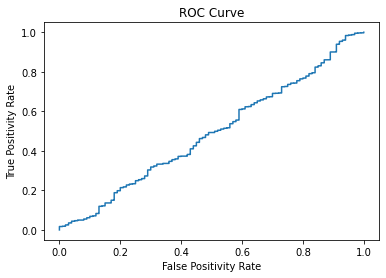

In [17]:
plt.plot(fpr,tpr)
plt.xlabel("False Positivity Rate")
plt.ylabel("True Positivity Rate")
plt.title("ROC Curve")
plt.show()

## Task-2


In [24]:
performance_matrix = performance_matrix()
file_name = "/Users/kunalbudhiraja/Downloads/5_b.csv"
data = performance_matrix.read_file_and_get_data(file_name)
data = data.sort_values('proba', ascending=False)
confusion_matrix = performance_matrix.get_confusion_matrix(data)
print("Confusion Matrix")
print(confusion_matrix)
#
## Print the F1-Score
precision = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[1][0])
recall = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1])
f1_score = 2 * precision * recall / (precision + recall)
print("Value of f1 score", f1_score)
#
## arrange the probabilities scores
sorted_data = copy.copy(data.to_numpy())

tpr = []
fpr = []
accuracy = []
highest_accuracy = 0
for each in sorted_data:
    performance_matrix.threshold = each[1]
    confusion_matrix = performance_matrix.get_confusion_matrix(data)
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[1][0]
    TN = confusion_matrix[0][0]
    FN = confusion_matrix[0][1]
    tpr.append(TP / (TP + FN))
    fpr.append(FP / (TN + FP))
    accuracy_current_iteration = (TP + TN) / (TP + TN + FP + FN)
    accuracy.append(accuracy_current_iteration)
    if accuracy_current_iteration > highest_accuracy:
        highest_accuracy = accuracy_current_iteration

print("AUC score " + str(np.trapz(tpr, fpr)))
print("Accuracy " + str(highest_accuracy))

Confusion Matrix
[[9761   45]
 [ 239   55]]
Value of f1 score 0.2791878172588833
AUC score 0.9377570000000001
Accuracy 0.995049504950495


In [26]:
print("AUC score: "+str(np.trapz(tpr,fpr)))

AUC score: 0.9377570000000001


## ROC curve

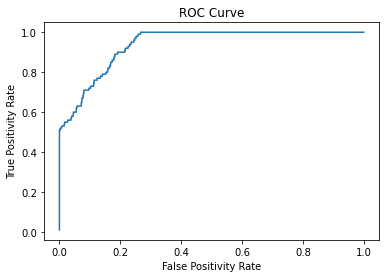

In [27]:
plt.plot(fpr,tpr)
plt.xlabel("False Positivity Rate")
plt.ylabel("True Positivity Rate")
plt.title("ROC Curve")
plt.show()

## Task-3


In [28]:
import numpy as np
import pandas as pd
import copy


class performance_matrix:
    def __init__(self):
        self.threshold = 0.5
        self.confusion_matrix = np.arange(4).reshape(2, 2)

    def read_file_and_get_data(self, file_name):
        return pd.read_csv(file_name)

    def get_confusion_matrix(self, data):
        params = self.get_confusion_matrix_params(data)
        self.confusion_matrix[0][0] = params[0]
        self.confusion_matrix[0][1] = params[1]
        self.confusion_matrix[1][0] = params[2]
        self.confusion_matrix[1][1] = params[3]
        return self.confusion_matrix

    def get_confusion_matrix_params(self, data):
        tn = 0
        fn = 0
        fp = 0
        tp = 0
        positives_predicted = data['prob'] >= self.threshold
        predicted = positives_predicted.value_counts()
        if True in predicted:
            size_positives_predicted = predicted[True]
        else:
            size_positives_predicted = 0
        size_negative_predicted = len(data) - size_positives_predicted
        if size_positives_predicted > 0:
            actual_positive_points = data[positives_predicted]['y'] == 1
            predicted = actual_positive_points.value_counts()
            if True in predicted:
                tp = predicted[True]
            if False in predicted:
                fp = predicted[False]

        if size_negative_predicted > 0:
            negative_predicted = data['prob'] < self.threshold
            actual_negative_points = data[negative_predicted]['y'] == 0
            predicted = actual_negative_points.value_counts()
            if True in predicted:
                tn = predicted[True]
            if False in predicted:
                fn = predicted[False]
        return [tn, fn, fp, tp]


values = np.linspace(0, 1, 10000)
performance_matrix = performance_matrix()
file_name = "/Users/kunalbudhiraja/Downloads/5_c.csv"
data = performance_matrix.read_file_and_get_data(file_name)
A_values = {}
for each_value in values:
    performance_matrix.threshold = each_value
    confusion_matrix = performance_matrix.get_confusion_matrix(data)
    A = 500 * confusion_matrix[0][1] + 100 * confusion_matrix[1][0]
    A_values[each_value] = A

sorted_dict_A = {k: v for k, v in sorted(A_values.items(), key=lambda item: item[1])}
threshold_with_lowest_A = list(sorted_dict_A.keys())[0]
## Highest A value corresponds to this threshold
print("Highest threshold value", threshold_with_lowest_A)
print("Lowest value of A: ", sorted_dict_A[threshold_with_lowest_A])


Highest threshold value 0.22992299229922994
Lowest value of A:  141000


## Task-4

In [29]:
import numpy as np
import pandas as pd
import copy


class performance_matrix:
    def __init__(self):
        self.threshold = 0.5
        self.confusion_matrix = np.arange(4).reshape(2, 2)

    def read_file_and_get_data(self, file_name):
        return pd.read_csv(file_name)

    def mean_squared_error(self):
        1 / n(observed_value - predicted_value) ^ 2

values = np.linspace(0, 1, 50)
performance_matrix = performance_matrix()
file_name = "/Users/kunalbudhiraja/Downloads/5_d.csv"
data = performance_matrix.read_file_and_get_data(file_name)
## Mean Squared Error
mse = (np.square(data['y'] - data['pred'])).mean(axis=0)
print("Mean Squared Error",mse)

# ## Mean Absolute Percentage Error
sum_actual_values = np.sum(data['y'])
absolute_error = np.absolute(data['y'] - data['pred']).sum()
MAPE = absolute_error / sum_actual_values
print("Mean absolute percentage error",MAPE)
## R Squared Value
rss = np.sum(np.square(data['pred'] - data['y']))
tss = np.sum(np.square(data['y'] - data['pred'].mean(axis=0)))
r_squared = 1-(rss/tss)
print("R Squared error",r_squared)

Mean Squared Error 177.16569974554707
Mean absolute percentage error 0.1291202994009687
R Squared error 0.9563583447288622
